In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00


In [3]:
!pip install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.7 MB/s eta 0:00:00


In [4]:
from PIL import Image
import numpy as np
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
image = load_image(
    "https://huggingface.co/CrucibleAI/ControlNetMediaPipeFace/resolve/main/samples_laion_face_dataset/family_annotation.png"
)

In [6]:
controlnet = ControlNetModel.from_pretrained("CrucibleAI/ControlNetMediaPipeFace", torch_dtype=torch.float16, variant="fp16")
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

In [8]:
pipe = pipe.to("cuda")

In [9]:
#pipe.enable_xformers_memory_efficient_attention()
#pipe.enable_model_cpu_offload()

In [10]:
#pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

In [11]:
url = "https://huggingface.co/datasets/patrickvonplaten/images/resolve/main/aa_xl/000000009.png"

  0%|          | 0/30 [00:00<?, ?it/s]

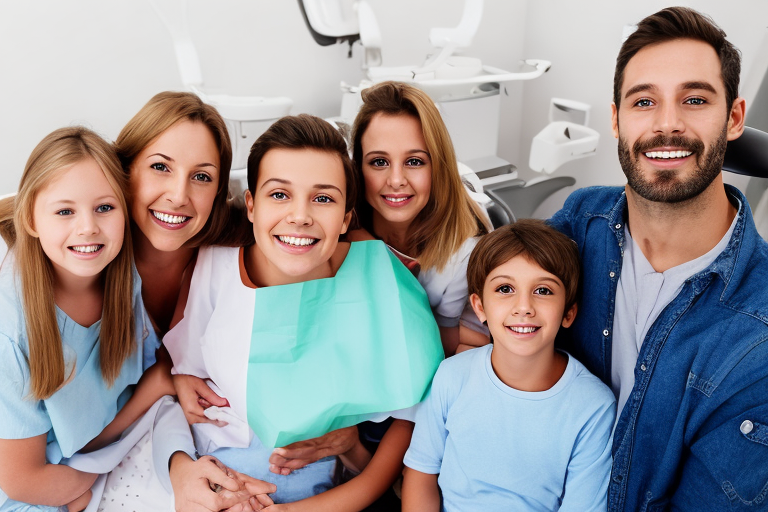

In [12]:
image = pipe("a happy family at a dentist advertisement", image=image, num_inference_steps=30).images[0]
image